<a href="https://colab.research.google.com/github/shashankbhagat/Recommendation-System/blob/master/Recommendation_System_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import csv
from collections import defaultdict
import random
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot

In [0]:
dataset = pd.read_csv("ratings.csv",names="user_id,item_id,rating,timestamp".split(","),header=None)

In [0]:
dataset=dataset[1:]
dataset.reset_index(inplace=True)
dataset=dataset.drop(columns=['index'])

In [0]:
dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.item_id.astype('category').cat.codes.values

In [0]:
train,test=train_test_split(dataset,test_size=0.2)

In [0]:
n_users, n_movies = len(dataset.user_id.unique()), len(dataset.item_id.unique())
n_latent_factors = 3

In [0]:
movie_input=keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies+1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec=keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input=keras.layers.Input(shape=[1],name='User')
user_vec=keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users+1,n_latent_factors,name='User-Embedding')(user_input))

prod=keras.layers.dot([movie_vec,user_vec],axes=1) #try axes -1 or 1.   #.merge([movie_vec,user_vec],mode='dot',name='DotProduct')
model=keras.Model([user_input,movie_input],prod)
model.compile('adam','mean_squared_error')

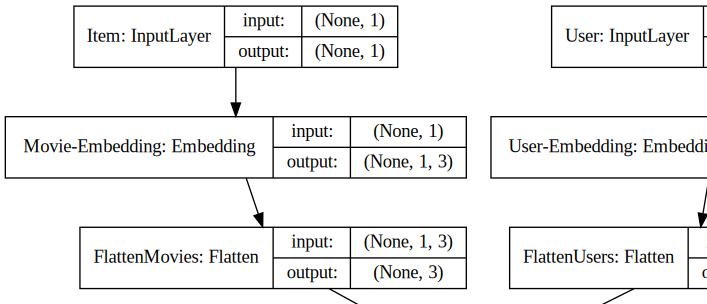

In [81]:
SVG(model_to_dot(model,show_shapes=True,show_layer_names=True,rankdir='HB').create(prog='dot',format='svg'))

In [82]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 3)         29175       Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 3)         1833        User[0][0]                       
____________________________________________________________________________________________

In [0]:
log_dir="/content/log/"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=10,
                         write_images=True)
history=model.fit([train.user_id,train.item_id],train.rating,epochs=5,verbose=0,validation_data=([test.user_id,test.item_id],test.rating),callbacks=[tensorboard_callback])



In [101]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-09-02 22:43:16--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.223.24.224, 52.7.202.148, 52.1.34.99, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.223.24.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13607069 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  12.98M  18.5MB/s    in 0.7s    

2019-09-02 22:43:17 (18.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13607069/13607069]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(log_dir)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [117]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://31ab4812.ngrok.io
